In [1]:
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import random
import scipy.misc
import os
random.seed(234)

import cv2
from multiprocessing import Pool

datadir='./maskdata/fake1/'
target='./maskdata/faketrans/'

In [ ]:
def makeimages(imgId):
    imgf=os.path.join(datadir,imgId)
    print(imgf)
    img=io.imread(imgf)
    kernel = np.ones((5,5),np.uint8)
    plt.figure()
    plt.imshow(img)
    return
    
    size = (img.shape[0])/2
    tmimg,tmmask = img[:size,:,:].astype('uint8'),img[size:,:,:]
    mask = tmmask[:,:,0]/255    
  
#     scipy.misc.imsave('./maskdata/fake1/'+str(imgId)+'_'+str(idx)+'.jpg', finalwithmask)
    

# makeimages(imgIds[0])
imgIds = os.listdir(datadir)[:2]
pool = Pool(processes=2)
pool.map(makeimages,imgIds)

./maskdata/fake1/471_0.jpg
./maskdata/fake1/8747_5.jpg
./maskdata/fake1/14238_2.jpg
./maskdata/fake1/338_7.jpg
./maskdata/fake1/11181_9.jpg
./maskdata/fake1/6140_9.jpg
./maskdata/fake1/15652_4.jpg
./maskdata/fake1/8639_0.jpg
./maskdata/fake1/18688_4.jpg
./maskdata/fake1/7782_7.jpg
./maskdata/fake1/831_5.jpg
./maskdata/fake1/10727_1.jpg
./maskdata/fake1/20334_9.jpg
./maskdata/fake1/18783_3.jpg
./maskdata/fake1/6414_8.jpg
./maskdata/fake1/21212_4.jpg
./maskdata/fake1/684_5.jpg
./maskdata/fake1/3786_3.jpg
./maskdata/fake1/13020_5.jpg
./maskdata/fake1/4988_0.jpg


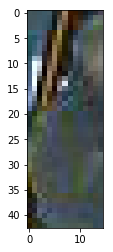

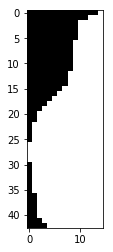

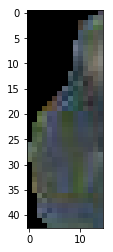

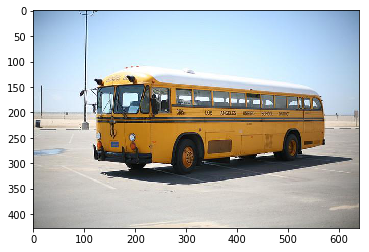

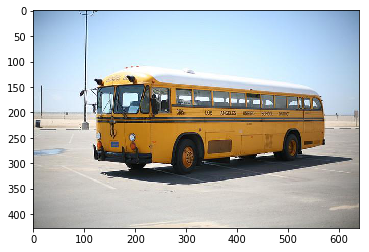

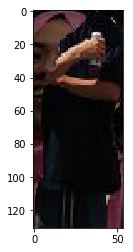

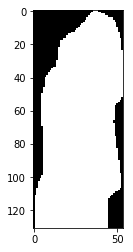

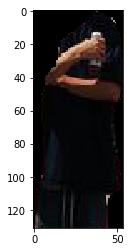

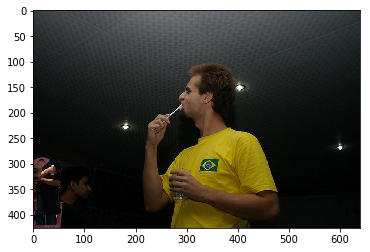

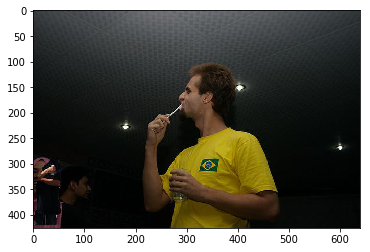

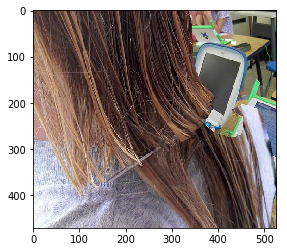

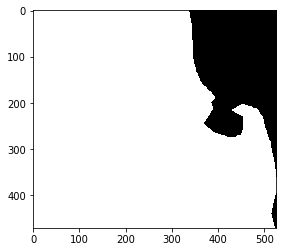

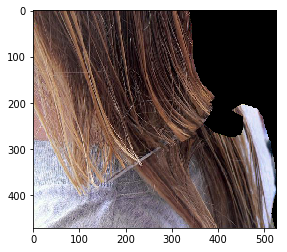

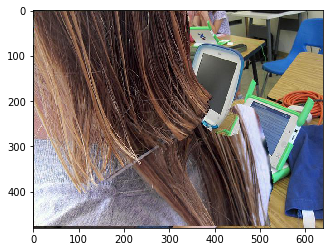

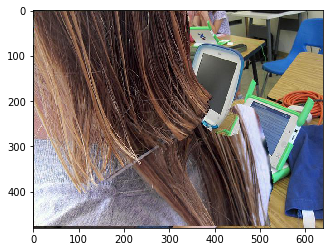

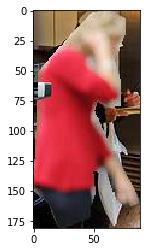

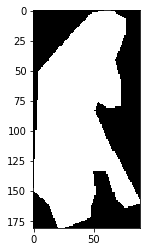

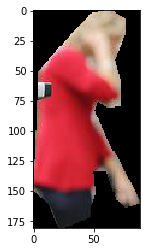

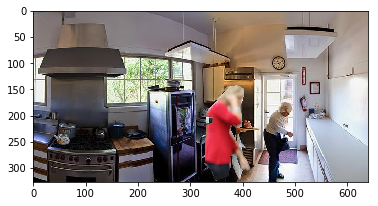

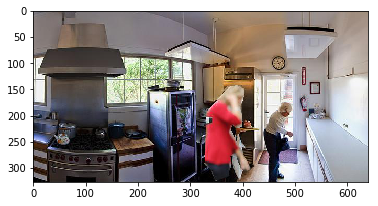

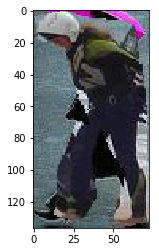

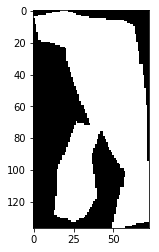

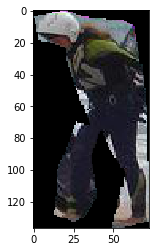

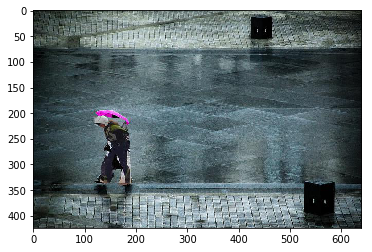

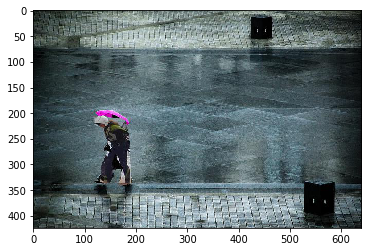

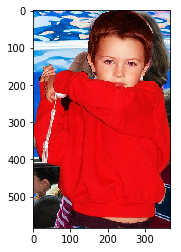

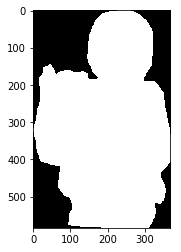

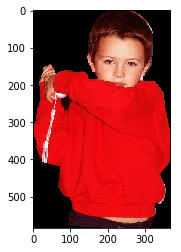

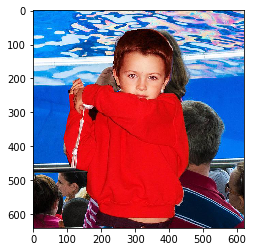

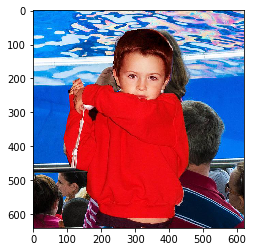

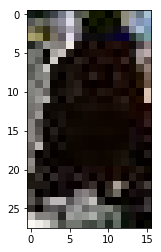

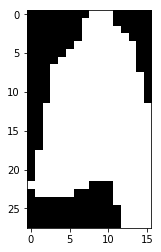

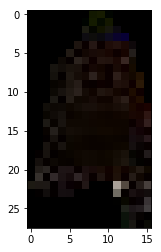

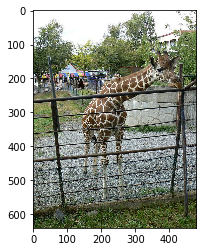

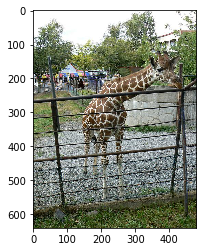

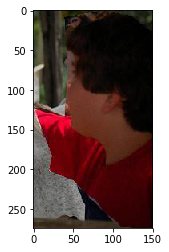

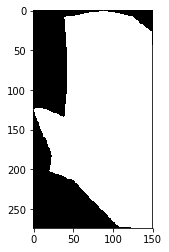

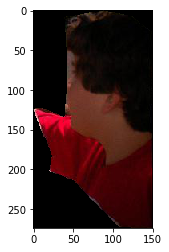

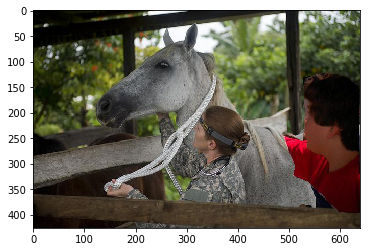

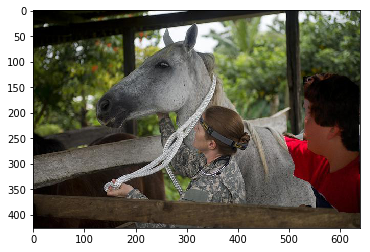

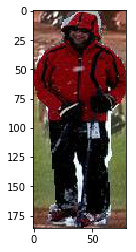

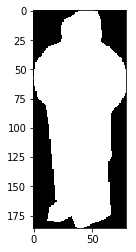

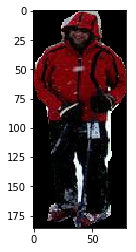

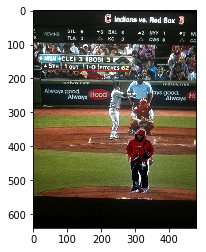

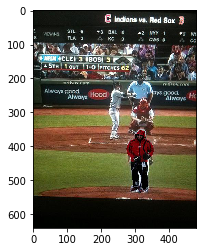

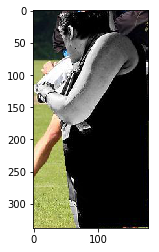

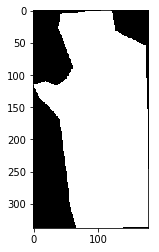

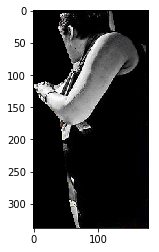

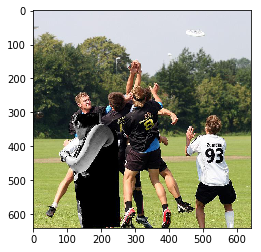

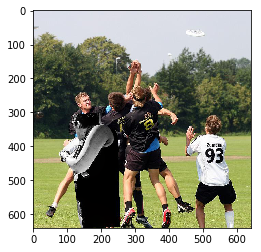

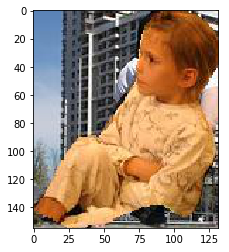

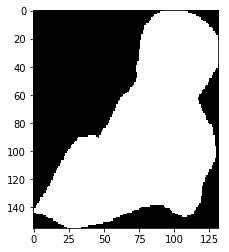

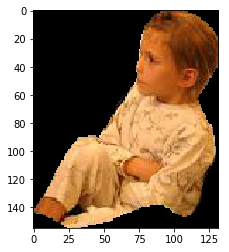

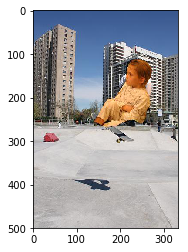

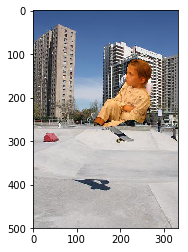

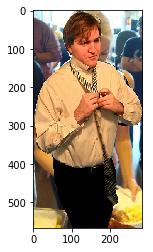

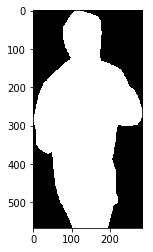

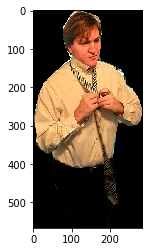

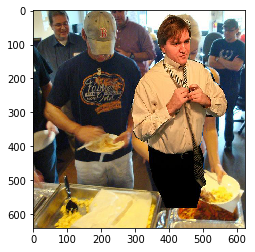

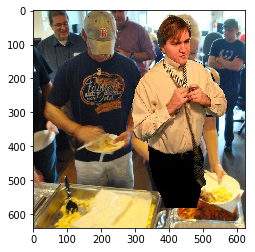

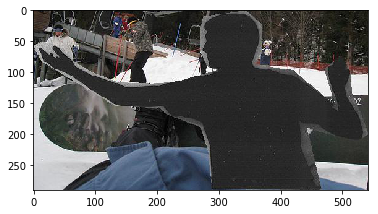

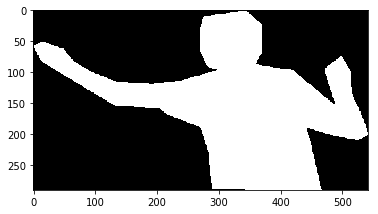

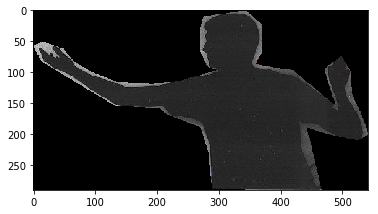

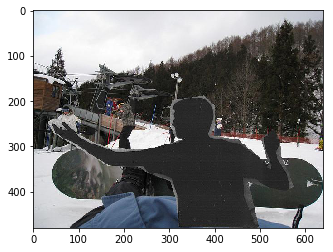

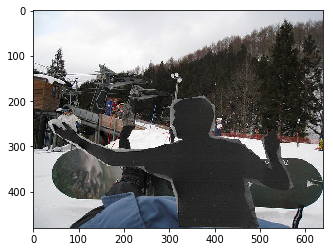

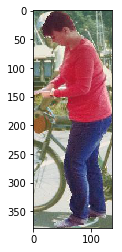

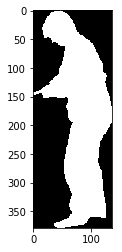

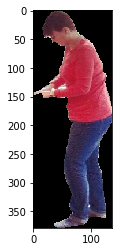

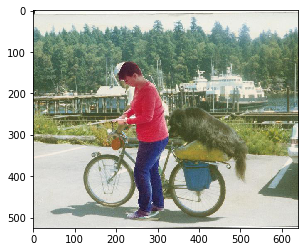

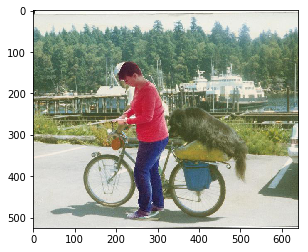

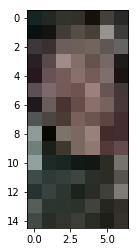

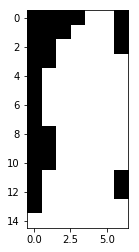

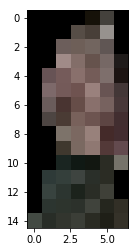

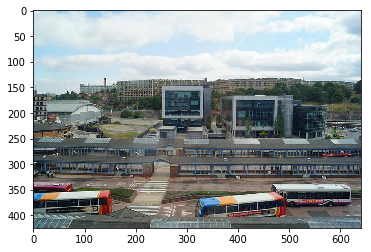

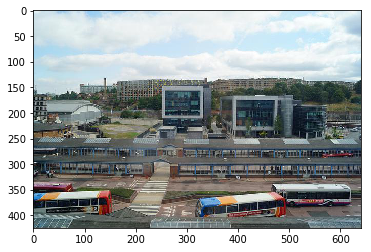

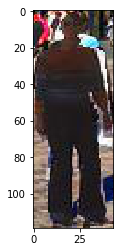

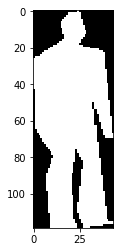

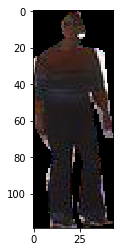

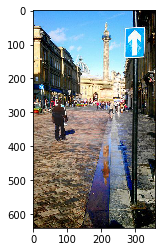

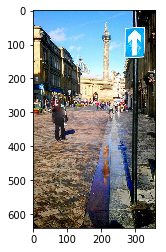

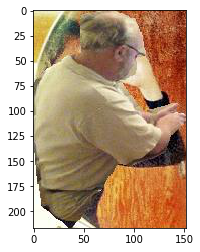

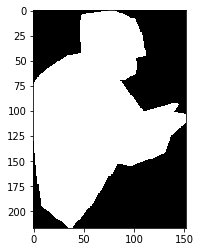

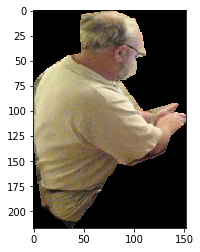

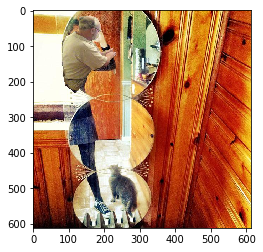

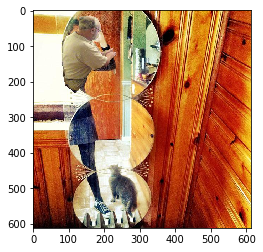

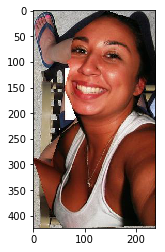

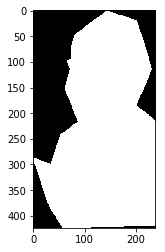

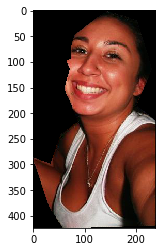

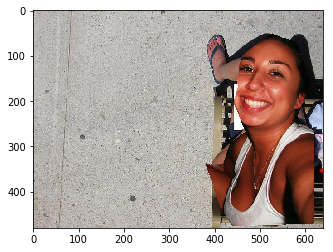

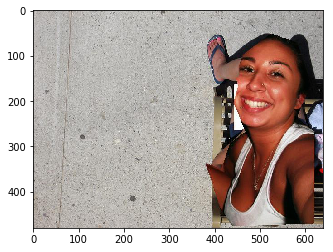

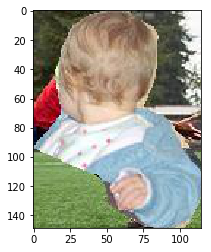

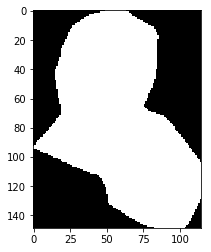

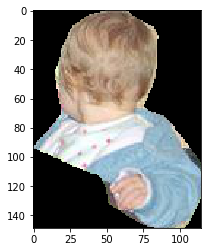

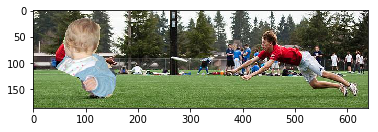

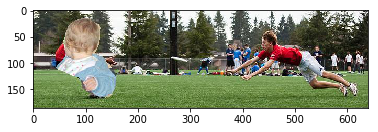

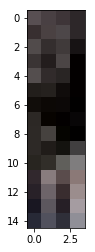

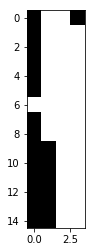

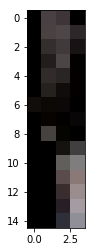

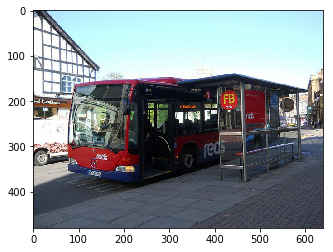

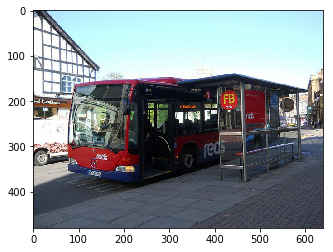

In [9]:
for imgId in os.listdir(datadir)[:20]:
    imgf=os.path.join(datadir,imgId)
    print(imgf)
    tmimg=io.imread(imgf)
    size = (tmimg.shape[0])/2
    img,mask = tmimg[:size,:,:].astype('uint8'),tmimg[size:,:,:].astype('uint8')
    minx,maxx,miny,maxy=10000,0,100000,0
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i,j,0]>200:
                minx=min(i,minx)
                maxx=max(i,maxx)
                miny=min(j,miny)
                maxy=max(j,maxy)
                mask[i,j,:]=255
            else:
                mask[i,j,:]=0
    center = ((miny+maxy)/2,(minx+maxx)/2)
    nmask = mask[minx:maxx,miny:maxy,:]
    src = img[minx:maxx,miny:maxy]
    plt.figure()
    plt.imshow(src)
    src= np.multiply(img[minx:maxx,miny:maxy],nmask/255)
    
    plt.figure()
    plt.imshow(nmask)
    plt.figure()
    plt.imshow(src)
    final = cv2.seamlessClone(src,img,nmask,center,cv2.NORMAL_CLONE)
    plt.figure()
    plt.imshow(img)
    plt.figure()
    plt.imshow(final)

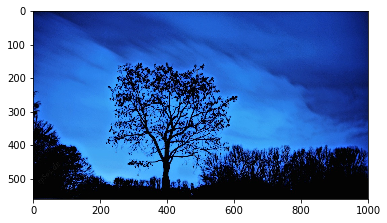

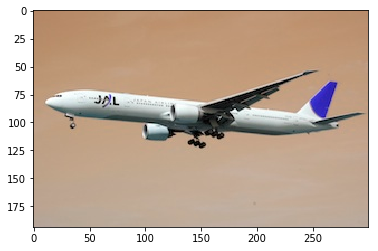

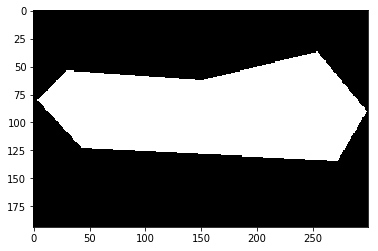

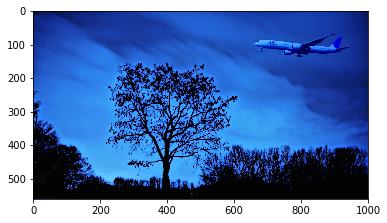

In [8]:

# Read images
src = cv2.imread("./learnopencv/SeamlessCloning/images/airplane.jpg")
dst = cv2.imread("./learnopencv/SeamlessCloning/images/sky.jpg")


# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))

# This is where the CENTER of the airplane will be placed
center = (800,100)
plt.figure()
plt.imshow(dst)
plt.figure()
plt.imshow(src)
plt.figure()
plt.imshow(src_mask)
# print(src_mask[75,:])
# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

# Write result
plt.figure()
plt.imshow(output)


